In [1]:
import pandas as pd
import numpy as np
import os, glob

In [2]:
%load_ext autoreload
%autoreload 2

# Применение модуля аугментации табличных данных

Что хотелось бы добавить:
* Получение/единообразное оформление признаков
* Аугментация
* Получение агрегаций признаков
* Получение предсказания красного смещения
* Нормализация данных
* Работа с пропусками
* Построение промежуточных графиков

На данный момент есть получение признаков + аугментация

In [3]:
import classificationSGQ.augmentations as aug

/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/classificationSGQ/predictionsZ/process_counterparts.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
# Целевая выборка, чбе распределение хотим повторить 
train_data = pd.read_pickle(os.path.join(aug.train_data_path, aug.train_features), compression='gzip')
# Выборка для аугментации с полученными признаками
input_data = pd.read_pickle('data/rename_x1_class.pkl_gz', compression='gzip')
# input_data = pd.read_pickle('data/input.gz_pkl', compression='gzip')

In [5]:
# При несовпадении названий для квазаров
# input_data = aug.change_coord(input_data)

In [6]:
input_data

nrow                objID          ra        dec     zspec  \
0      765558   166771828504836546  182.850396  48.979910  0.046132   
1      295976   140921926169192374  192.616971  27.434890  0.021385   
5      267711   153541551169831903  155.117013  37.951053  0.046178   
6       94182   120741855100415434  185.510020  10.620819  0.025434   
11     476230   114671598619635888  159.861973   5.562852  0.028537   
...       ...                  ...         ...        ...       ...   
60414  960359  1237668503831839169  252.083230  50.783279       NaN   
60415  960360  1237665583790752642  252.201060  50.891273       NaN   
60416  960361  1237665584327361688  252.358160  51.708907       NaN   
60417  960362  1237665584327164382  252.128200  52.155919       NaN   
60418  960363  1237668504368578949  252.271570  51.330288       NaN   

       zspec_conf zspec_source  class     subclass class1  ...  \
0          -999.0         SDSS      3  STARFORMING         ...   
1          -999.0         SDSS      3    BROADLINE         ...   
5          -999.0         SDSS      3          N/A         ...   
6          -999.0         SDSS      3  STARFORMING         ...   
11         -999.0         SDSS      3  STARFORMING         ...   
...           ...          ...    ...          ...    ...  ...   
60414         NaN          NaN      1          NaN    NaN  ...   
60415         NaN          NaN      1          NaN    NaN  ...   
60416         NaN          NaN      1          NaN    NaN  ...   
60417         NaN          NaN      1          NaN    NaN  ...   
60418         NaN          NaN      1          NaN    NaN  ...   

      zoo_best-x1_ci1a_90_Lx_err zoo_best-x1_ci1b_90_Lx_err  \
0                            NaN                        NaN   
1                            NaN                        NaN   
5                            NaN                        NaN   
6                            NaN                        NaN   
11                           NaN                        NaN   
...                          ...                        ...   
60414                        NaN                        NaN   
60415                        NaN                        NaN   
60416                        NaN                        NaN   
60417                        NaN                        NaN   
60418                        NaN                        NaN   

       zoo_best-x1_ci1a_95 zoo_best-x1_ci1b_95 zoo_best-x1_ci1a_95_DL_cm  \
0                -0.023962            0.026538                       NaN   
1                -0.015042            0.014692                       NaN   
5                -0.023886            0.025979                       NaN   
6                -0.017423            0.074669                       NaN   
11               -0.027526            0.020971                       NaN   
...                    ...                 ...                       ...   
60414            -0.451445            0.228902                       NaN   
60415            -0.212508            2.934748                       NaN   
60416            -0.855885             1.92245                       NaN   
60417            -0.246795             2.79586                       NaN   
60418            -2.186238            0.501505                       NaN   

      zoo_best-x1_ci1b_95_DL_cm zoo_best-x1_ci1a_95_Lx zoo_best-x1_ci1b_95_Lx  \
0                           NaN                    NaN                    NaN   
1                           NaN                    NaN                    NaN   
5                           NaN                    NaN                    NaN   
6                           NaN                    NaN                    NaN   
11                          NaN                    NaN                    NaN   
...                         ...                    ...                    ...   
60414                       NaN                    NaN                    NaN   
60415                       NaN              

Имеем входную выборку и выборку для обучения моделей аугментации \
Для входной выборки не хватет несколько признкаов (не соответствие признаков для галактик и квазаров), поэтому мы будем получать их отдельно:

In [7]:
catalog = aug.Catalog(None, ('ra', 'dec'),
                      njobs=24, output_dir='data/input_aug',
                      assembled_dataset_path=os.path.join('data/input.gz_pkl'),
                      filename='input')
catalog.prepare_data(augmentation=False)

('raBest', 'decBest')
===== Defined use case: 4 =====
Use case 4
Use case prepare_features
===== False =====


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/classificationSGQ/predictionsZ/pzph1dot1.py:1465: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/classificationSGQ/predictionsZ/pzph1dot1.py:1489: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

'Done'

In [5]:
aug_model = aug.Augmentation(debug=False)

/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/classificationSGQ/augmentations.py:220: UserWarning:

path_to_models is not define. Will be used ./AugModel



In [6]:
aug_model.train(train_data) # Можно передать DataFrame или название файла

In [7]:
features = 'decals8tr_z'

### Аугментация

In [94]:
version = 'one_gauss' # (Первый тип)

In [ ]:
path_buf = '/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/all_from_local/output_augm'

./tmp_out/__buf__ exists
CLASS = 1


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/classificationSGQ/augmentations.py:80: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.

/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/classificationSGQ/augmentations.py:81: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up th

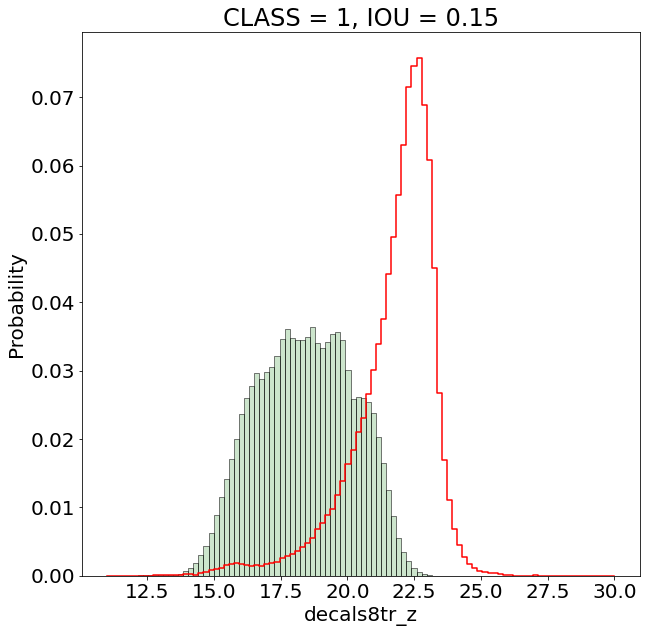

type_model 1
use_def_statistic -- decals8tr_z
mu = 3.8874999999999993, sigma = 0.0
count iter = 1
i = 0


KeyboardInterrupt: 

In [54]:
aug.predict_SGQ(aug_model, input_data, features=features, version=version, path_buf=path_buf, plot=True, return_data=False)

In [64]:
df_after = aug.read_after_augm(path='/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/all_from_local/output_augm', version=version)

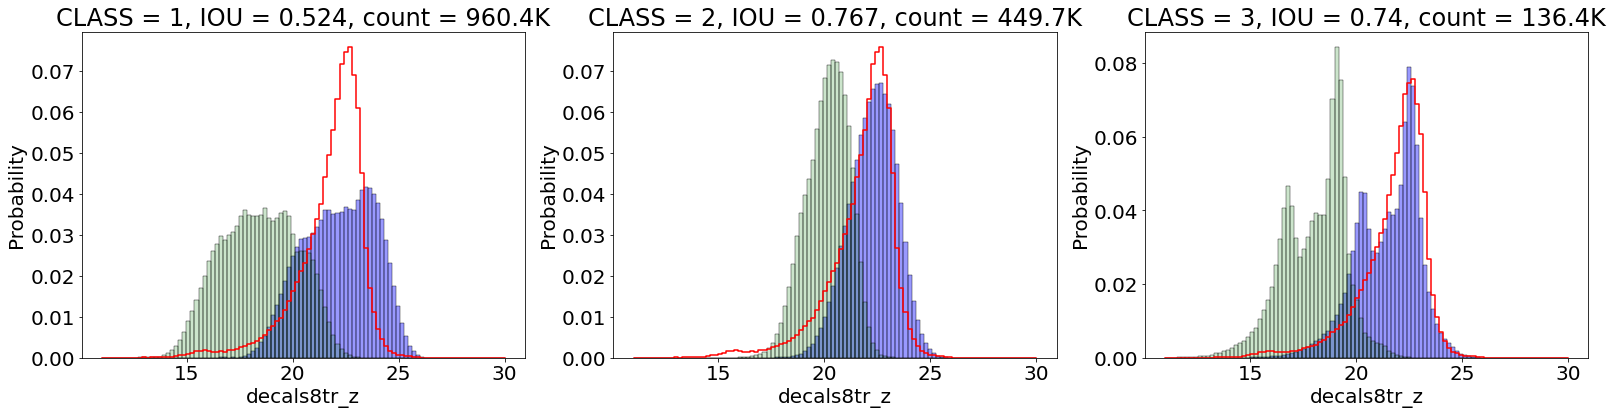

In [82]:
aug.plt_predict_SGQ(aug_model, input_data, features=features, version=version, path_buf=path_buf, metric='IOU')

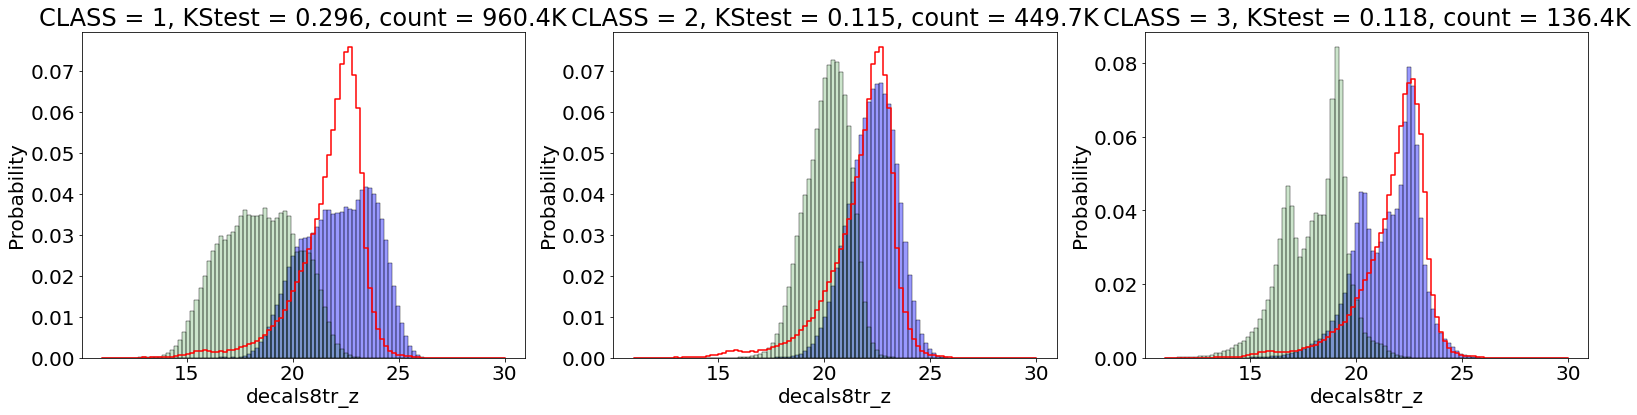

In [83]:
aug.plt_predict_SGQ(aug_model, input_data, features=features, version=version, path_buf=path_buf, metric='KStest')

In [ ]:
df_after = pzph_predict_SGQ(version=version, path_buf=path_buf)

In [31]:
f, axes = plt.subplots(ncols = 3, figsize=(24, 5), sharex=True)
aug.plt_version('train', 'zoo_best_z_max', features, ax=axes[0], path_to_files='/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/all_from_local/data/')
norm = aug.plt_version('before_all', 'zoo_best-x1_z_max', features, ax=axes[1])
for i, file in enumerate(list(glob.glob(os.path.join(path_buf, f'preds_{version}/df_augg_cls_*{version}*features.gz_pkl')))):
#     print(i, file)
    f = file.split('/')[-1]
    aug.plt_version(f"{file.split('/')[-1].split('.')[0]}", 'zoo_best-x1_z_max', features, ax=axes[2], path_to_files=os.path.join(path_buf, f'preds_{version}/end'), norm=norm, title=version, colorbar=(i==0))

[autoreload of classificationSGQ.study_model failed: Traceback (most recent call last):
  File "/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/nmalysheva/.conda/envs/nadya/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/nmalysheva/.conda/envs/nadya/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line

NameError: name 'plt' is not defined

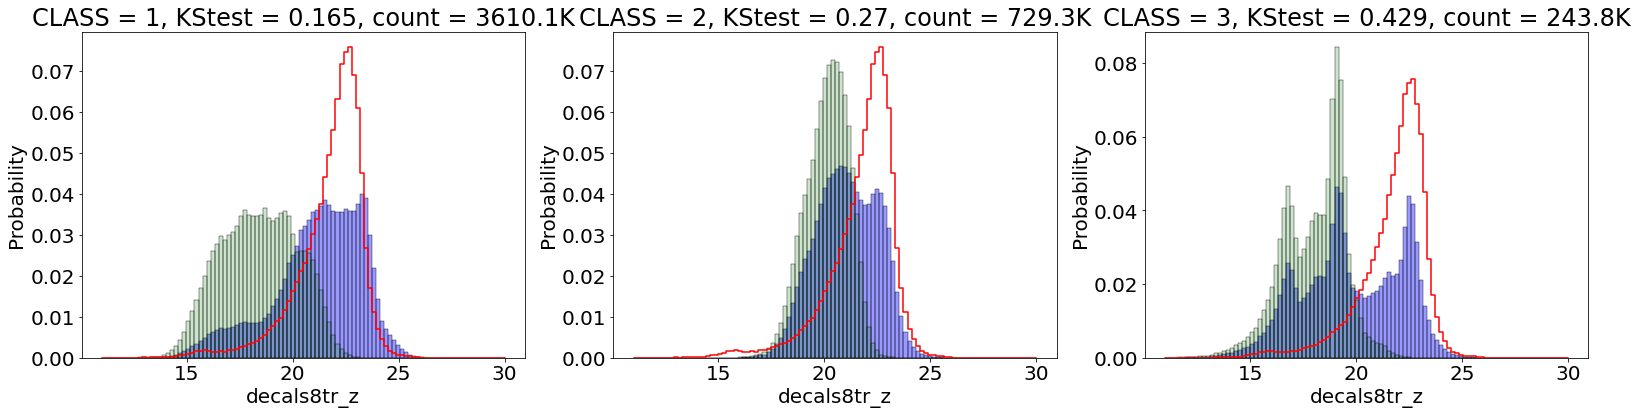

In [84]:
aug.plt_predict_SGQ(aug_model, input_data, features=features, version='optimization', path_buf='/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/all_from_local/output_augm', metric='KStest')

# Применения модуля обучения и применения моделей

Что хотелось бы видеть:
* Обучение моделей на данных (автоматический подбор гиперпараметров)
* Отбор признаков
* Построение интерпретации

In [3]:
import classificationSGQ.augmentations as aug
from classificationSGQ import study_model as SGQ

/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/classificationSGQ/predictionsZ/process_counterparts.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [8]:
version = 'optimization'
best_i = 3
path_buf = f'./data_aug/{best_i}'

In [27]:
# df_after = aug.read_after_pzph_predict(f'{path_buf}/preds_{version}/end', version)
# df_after

['./data_aug/3/preds_optimization/end/df_augg_cls_1_optimization_3_part-00000.features.gz_pkl', './data_aug/3/preds_optimization/end/df_augg_cls_1_optimization_3_part-00000.predictions.x1.gz_pkl', './data_aug/3/preds_optimization/end/df_augg_cls_1_optimization_3_part-00000.best.x1.gz_pkl']
['./data_aug/3/preds_optimization/end/df_augg_cls_1_optimization_3_part-00001.features.gz_pkl', './data_aug/3/preds_optimization/end/df_augg_cls_1_optimization_3_part-00001.predictions.x1.gz_pkl', './data_aug/3/preds_optimization/end/df_augg_cls_1_optimization_3_part-00001.best.x1.gz_pkl']
['./data_aug/3/preds_optimization/end/df_augg_cls_1_optimization_3_part-00002.features.gz_pkl', './data_aug/3/preds_optimization/end/df_augg_cls_1_optimization_3_part-00002.predictions.x1.gz_pkl', './data_aug/3/preds_optimization/end/df_augg_cls_1_optimization_3_part-00002.best.x1.gz_pkl']
['./data_aug/3/preds_optimization/end/df_augg_cls_1_optimization_3_part-00003.features.gz_pkl', './data_aug/3/preds_optimizatio

['./data_aug/3/preds_optimization/end/df_augg_cls_3_optimization_3_part-00001.features.gz_pkl', './data_aug/3/preds_optimization/end/df_augg_cls_3_optimization_3_part-00001.predictions.x1.gz_pkl', './data_aug/3/preds_optimization/end/df_augg_cls_3_optimization_3_part-00001.best.x1.gz_pkl']
['./data_aug/3/preds_optimization/end/df_augg_cls_3_optimization_3_part-00002.features.gz_pkl', './data_aug/3/preds_optimization/end/df_augg_cls_3_optimization_3_part-00002.predictions.x1.gz_pkl', './data_aug/3/preds_optimization/end/df_augg_cls_3_optimization_3_part-00002.best.x1.gz_pkl']
['./data_aug/3/preds_optimization/end/df_augg_cls_3_optimization_3_part-00003.features.gz_pkl', './data_aug/3/preds_optimization/end/df_augg_cls_3_optimization_3_part-00003.predictions.x1.gz_pkl', './data_aug/3/preds_optimization/end/df_augg_cls_3_optimization_3_part-00003.best.x1.gz_pkl']
['./data_aug/3/preds_optimization/end/df_augg_cls_3_optimization_3_part-00004.features.gz_pkl', './data_aug/3/preds_optimizatio

sdssdr16_g_cmodel-decals8tr_Lw2  ps_gKronFluxErr  decals8tr_r  \
0                              0.033329              NaN    12.851059   
1                             -2.447228     1.346200e-06    13.272060   
2                              0.781059              NaN    12.345924   
3                             -2.353674              NaN    13.780078   
4                             -2.616110     3.895050e-06    13.772695   
...                                 ...              ...          ...   
500631                         2.213608              NaN    25.031757   
500632                        -1.417140     3.756680e-07    25.116188   
500633                         3.310534              NaN    25.884502   
500634                         1.046429              NaN    24.791300   
500635                         0.490591              NaN    24.336470   

        ps_iKronFlux    nrow  psdr2_y_psf-kron  fold   ps_zPSFFlux  \
0                NaN  135679               NaN     0           NaN   
1       1.091700e-03  314500         -0.122092     1  1.233610e-03   
2                NaN  485074               NaN     0           NaN   
3                NaN  333124               NaN     0           NaN   
4       9.758440e-03  450798         -0.027838     1  9.897850e-03   
...              ...     ...               ...   ...           ...   
500631           NaN   10192               NaN     0           NaN   
500632  9.515812e-06  642113          0.000000     0 -1.018249e-06   
500633           NaN   52936               NaN     1           NaN   
500634           NaN  310567               NaN     0           NaN   
500635  2.560299e-07  542103          0.000000     0  7.008951e-07   

        decals8tr_Lw1 subClass  ...   ps_gPSFFlux  \
0           12.983910     b'A'  ...           NaN   
1           18.047075     b'A'  ...  1.139700e-03   
2           13.275153     b'A'  ...           NaN   
3           15.629631     b'A'  ...           NaN   
4           15.711251     b'A'  ...  9.688900e-03   
...               ...      ...  ...           ...   
500631      24.683437      NaN  ...           NaN   
500632      22.852440      NaN  ...  4.746302e-07   
500633      22.079982      NaN  ...           NaN   
500634      23.098181      NaN  ...           NaN   
500635      21.693345      NaN  ...  3.020978e-07   

        sdssdr16_g_cmodel-decals8tr_Lw1  sdss_cModelFluxIvar_z  psdr2_g-i_psf  \
0                              0.667516           2.319068e-03            NaN   
1                             -1.794031           1.122962e-01       0.088402   
2                              1.418401           2.180336e-04            NaN   
3                             -1.710735           1.018087e-02            NaN   
4                             -1.962008           1.202900e-02      -0.090639   
...                                 ...                    ...            ...   
500631                        -0.321723           3.879150e-01            NaN   
500632                        -1.906763           2.054465e-01      -0.404706   
500633                         2.660329           1.314002e-10            NaN   
500634                         0.437542           4.049705e-01            NaN   
500635                         1.798415           1.418185e+00       0.543685   

        ps_yKronFluxErr  sdss_psfFluxIvar_u  gaiaedr3_phot_g_mean_flux  \
0                   NaN            0.135915                3199.238630   
1              0.000005            0.273372                6493.706383   
2                   NaN            0.000122              289422.664805   
3                   NaN            0.003353               58482.781800   
4              0.000006            0.007344               61578.258378   
...                 ...                 ...                        ...   
500631              NaN           37.409313                        NaN   
500632              NaN           28.518099                        NaN   
500633        

In [28]:
# df_after.to_pickle(f'./data/pred_{version}_{best_i}.gz_pkl', compression='gzip')

In [9]:
df_after = aug.Catalog.read_table(f'./data/pred_{version}_{best_i}.gz_pkl')

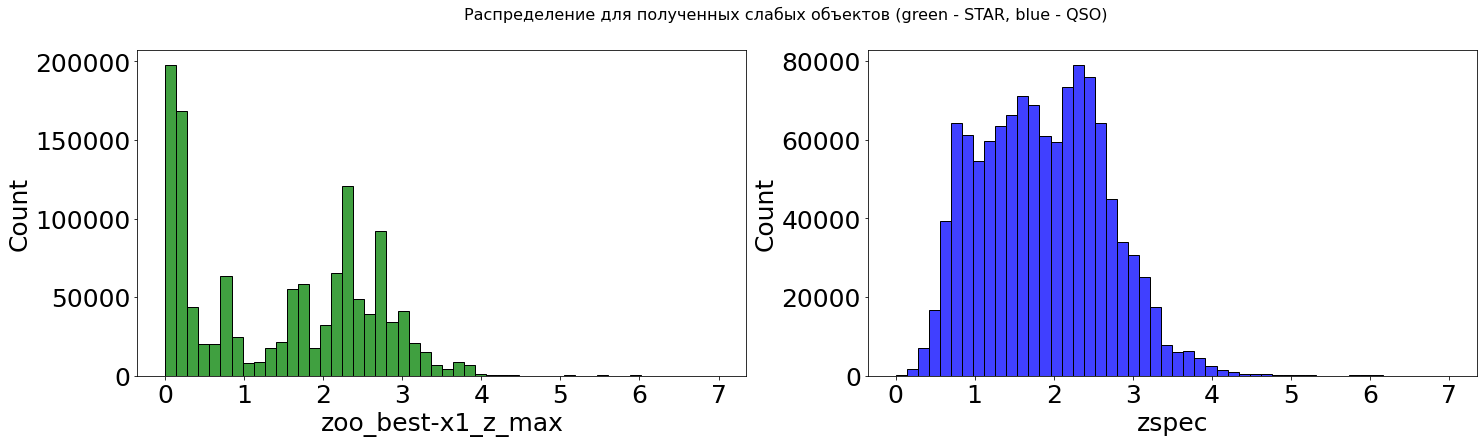

STAR 1545554 
QSO 1170914 
GALAXY 500636


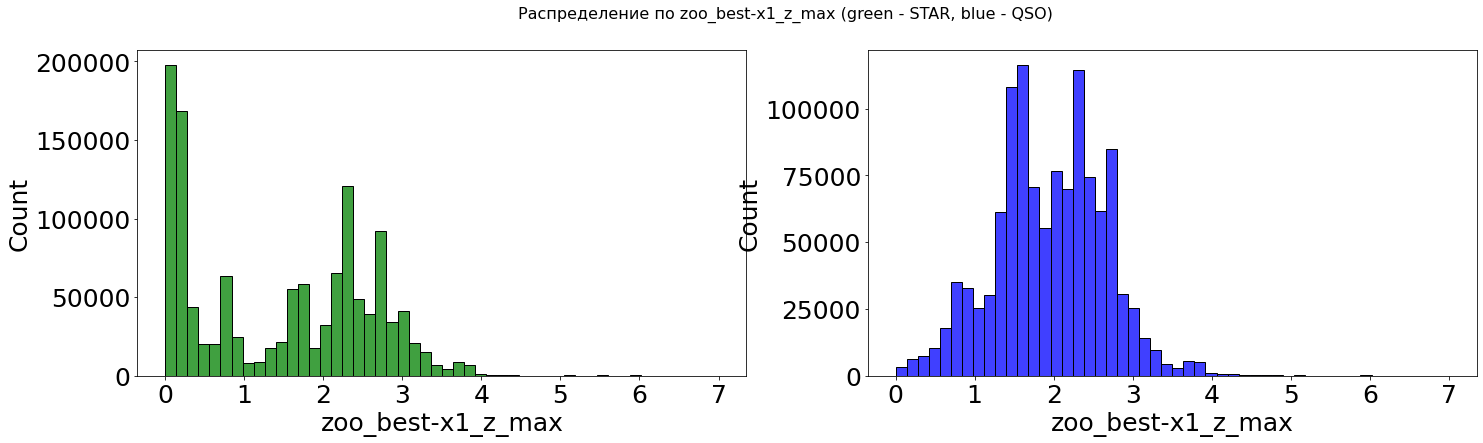

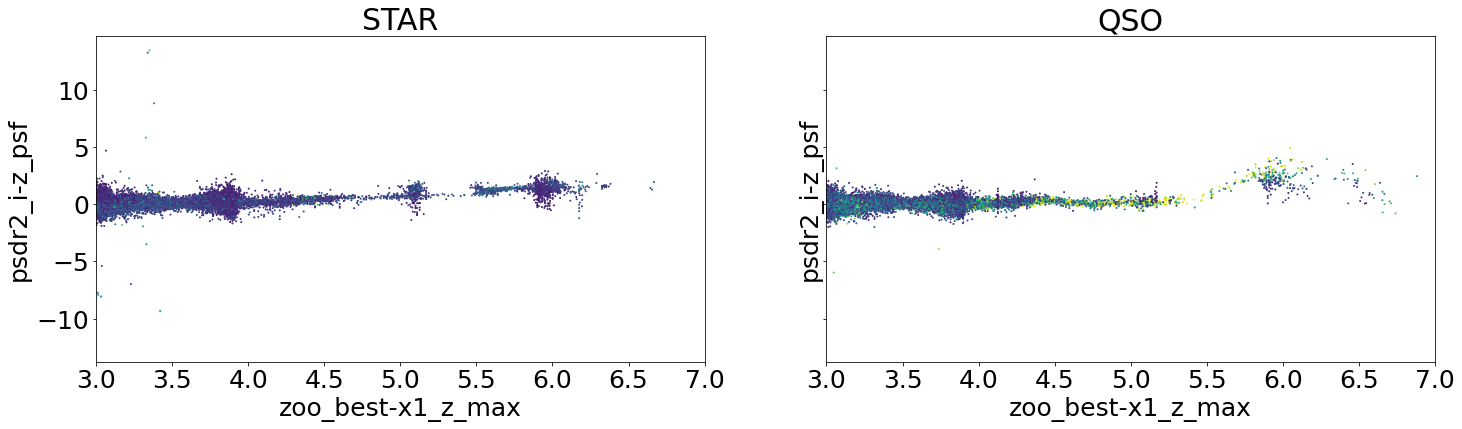

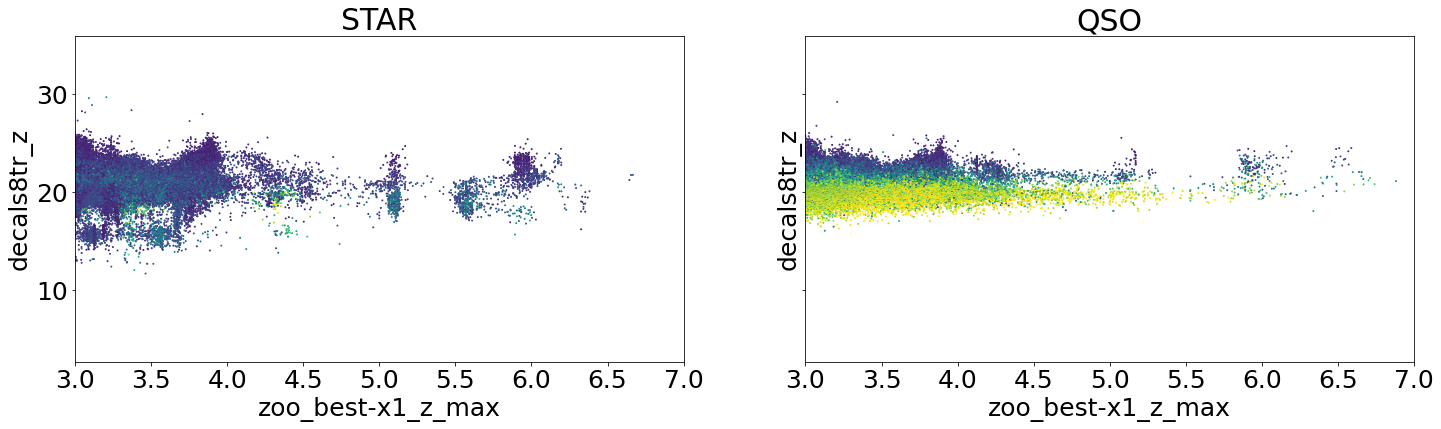

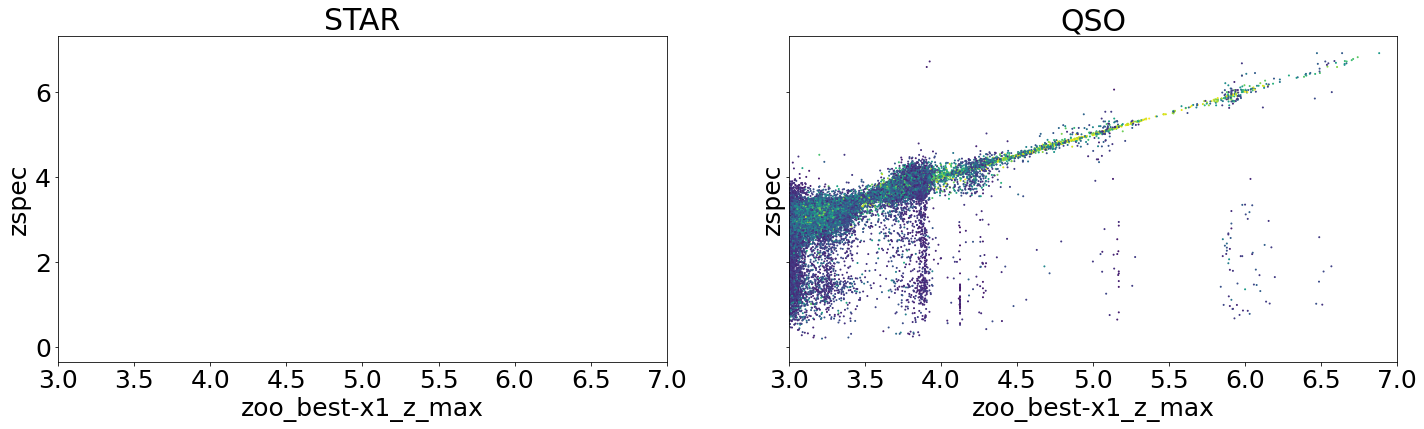

In [10]:
SGQ.report_plots(df_after)

In [15]:
model = SGQ.SGQModel(version=version)

In [16]:
model.train(df_after, overviews=['sdssdr16+psdr2+all_decals8tr'])

Директория ./models/optimization/models_0/not_j уже существует
sdssdr16+psdr2+all_decals8tr
./models/optimization/models_0/not_j/model_sdssdr16+psdr2+all_decals8tr.pkl already exists
Директория ./models/optimization/models_1/not_j уже существует
sdssdr16+psdr2+all_decals8tr
Number of features 65
Train (1166119, 66)  Test (292407, 66)
Train  500000 467164 198955
Test  125877 116791 49739
100%|██████████| 50/50 [1:47:08<00:00, 128.57s/trial, best loss: -0.9523221900743676]  
({'colsample_bytree': 0.634831144227124, 'min_child_samples': 75, 'num_leaves': 67, 'subsample_freq': 12}, <hyperopt.base.Trials object at 0x7f7ca424ff90>)
29.358851194381714
0.9522480651967976
./models/optimization/models_1/not_j/model_sdssdr16+psdr2+all_decals8tr.pkl


In [35]:
# pred = modecl.predict(df_after, train=True)
# proba = model.predict_proba(df_after, train=True)
pred_gaia = model.predict_gaia(df_after)

In [22]:
df_after['gaiaedr3_parallax']

0         0.006008
1         0.049375
2         1.114639
3         0.626022
4         0.172406
            ...   
500631         NaN
500632         NaN
500633         NaN
500634         NaN
500635         NaN
Name: gaiaedr3_parallax, Length: 3217104, dtype: float64

In [4]:
models = [
    'big_models',#: SGQ.SGQModel(version='big_models'),
    'one_gauss',#: SGQ.SGQModel(version='one_gauss'),
    'input+one_gauss',#: SGQ.SGQModel(version='input+one_gauss'),
    'optimization',#: SGQ.SGQModel(version='optimization'),
    'input+optimization'#: SGQ.SGQModel(version='input+optimization'),
#     'optimization': SGQ.SGQModel(version='optimization'),
#     'optimization': SGQ.SGQModel(version='optimization'),
    ]
data = {
    'input': 'data/rename_x1_class.pkl_gz',
    'one_gauss': './data/one_gauss.gz_pkl',
#     'input+one_gauss': './data/input+one_gauss.gz_pkl',
    'optimization': './data/pred_optimization_3.gz_pkl',
#     'input+optimization': './data/input+optimization.gz_pkl',
#     'optimization': SGQ.SGQModel(version='optimization'),
#     'optimization': SGQ.SGQModel(version='optimization'),
}

In [5]:
res = {
    'big_models': {},
    'one_gauss': {},
    'input+one_gauss': {},
    'optimization': {},
    'input+optimization': {}
}


for type_data in data:
    df = pd.read_pickle(data[type_data], compression='gzip')
    for type_model in models:
        model = SGQ.SGQModel(version=type_model)
        res[type_model][type_data] = model.test_table(df).round(3)

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning:

Trying to unpickle estimator LabelEncoder from version 0.22.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning:

Trying to unpickle estimator RobustScaler from version 0.22.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/pytho

ALL
matrix [[1378    7    4]
 [ 125 5570   18]
 [  45   14 1335]]
decals8tr_z>20
matrix [[1354   30    5]
 [  88 5615    9]
 [ 305  173  915]]


/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names



ALL
matrix [[1058  330    1]
 [  59 5650    4]
 [  34  881  478]]
decals8tr_z>20
matrix [[1053  333    2]
 [  66 5644    2]
 [ 316  977  100]]


/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names



ALL
matrix [[1090  297    2]
 [  63 5646    3]
 [  37  799  558]]
decals8tr_z>20
matrix [[1071  315    3]
 [  71 5640    1]
 [ 325  964  104]]


/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names



ALL
matrix [[1169  212    8]
 [  62 5628   22]
 [  19   35 1339]]
decals8tr_z>20
matrix [[1189  188   12]
 [  71 5627   15]
 [ 225  239  929]]


/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names



ALL
matrix [[1174  207    7]
 [  62 5629   22]
 [  19   35 1340]]
decals8tr_z>20
matrix [[1191  185   12]
 [  70 5628   14]
 [ 219  233  941]]


/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning:

Trying to unpickle estimator LabelEncoder from version 0.22.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning:

Trying to unpickle estimator RobustScaler from version 0.22.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/pytho

ALL
matrix [[1238  149    1]
 [2199 3499   15]
 [ 900  220  273]]
decals8tr_z>20
matrix [[1201  187    1]
 [2223 3478   12]
 [1023  255  116]]


/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names



ALL
matrix [[1076  305    7]
 [ 456 5231   25]
 [ 120   27 1246]]
decals8tr_z>20
matrix [[1196  184    9]
 [ 469 5220   24]
 [ 144   21 1228]]


/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names



ALL
matrix [[1082  299    8]
 [ 466 5222   25]
 [ 121   27 1245]]
decals8tr_z>20
matrix [[1200  180    9]
 [ 478 5210   24]
 [ 144   21 1228]]


/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names



ALL
matrix [[1053  320   16]
 [ 393 5273   47]
 [  89   25 1279]]
decals8tr_z>20
matrix [[1161  209   19]
 [ 403 5273   37]
 [ 107   22 1264]]


/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names



ALL
matrix [[1047  328   14]
 [ 391 5274   48]
 [  89   24 1280]]
decals8tr_z>20
matrix [[1154  217   17]
 [ 401 5274   37]
 [ 107   22 1264]]


/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning:

Trying to unpickle estimator LabelEncoder from version 0.22.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning:

Trying to unpickle estimator RobustScaler from version 0.22.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/pytho

ALL
matrix [[1275  112    2]
 [1606 4094   12]
 [ 721  181  492]]
decals8tr_z>20
matrix [[1227  160    1]
 [1872 3832    8]
 [1013  253  128]]


/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names



ALL
matrix [[1154  228    7]
 [ 291 5404   18]
 [ 108  257 1028]]
decals8tr_z>20
matrix [[1182  196   10]
 [ 336 5357   20]
 [ 150   43 1200]]


/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names



ALL
matrix [[1165  216    7]
 [ 299 5396   18]
 [ 109  235 1050]]
decals8tr_z>20
matrix [[1185  194   10]
 [ 344 5348   20]
 [ 150   43 1200]]


/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names



ALL
matrix [[1173  201   15]
 [ 249 5431   32]
 [  79   22 1293]]
decals8tr_z>20
matrix [[1169  201   18]
 [ 286 5397   30]
 [ 111   27 1255]]


/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names



ALL
matrix [[1168  206   14]
 [ 247 5433   32]
 [  78   22 1293]]
decals8tr_z>20
matrix [[1161  210   18]
 [ 283 5399   30]
 [ 111   27 1256]]


In [13]:
begin_tb = """\\begin{table}[]
\centering
\\resizebox{\\textwidth}{!}{%
\\begin{tabular}{cc|cccc|cccc|cccc|}
\\cline{3-14}
 & \\textbf{} & \multicolumn{4}{c|}{\\textbf{S}} & \multicolumn{4}{c|}{\\textbf{Q}} & \multicolumn{4}{c|}{\\textbf{G}} \\\\ \cline{3-14} 
\multicolumn{1}{l}{} & \\textbf{} & \multirow{2}{*}{\\textbf{precision}} & \multirow{2}{*}{\\textbf{recall}} & \multirow{2}{*}{\\textbf{roc-auc}} & \multirow{2}{*}{\\textbf{count}} & \multirow{2}{*}{\\textbf{precision}} & \multirow{2}{*}{\\textbf{recall}} & \multirow{2}{*}{\\textbf{roc-auc}} & \multirow{2}{*}{\\textbf{count}} & \multirow{2}{*}{\\textbf{precision}} & \multirow{2}{*}{\\textbf{recall}} & \multirow{2}{*}{\\textbf{roc-auc}} & \multirow{2}{*}{\\textbf{count}} \\\\ \cline{1-2}
\multicolumn{1}{|c|}{\\textbf{data}} & \\textbf{section} &  &  &  &  &  &  &  &  &  &  &  &  \\\\ \hline"""
end_tb = """
\end{tabular}%
}
\caption{}
\label{tab:my-table}
\end{table}
"""

def change_max_in_column(inp):
    df = inp.copy().astype(str)
    for i in inp:
        if i[1] == 'count':
            continue
            
        b = df[i[0]]
        a = b.loc[:, i[1]]
        a.loc[inp[i[0]][i[1]].idxmax()] =  f"\\textbf{{{inp.loc[:, i[0]].loc[inp[i[0]][i[1]].idxmax(), i[1]]}}}"
        b.loc[:, i[1]] = a
        df[i[0]] = b
    return df

def res_to_latex(inp, title=''):
    begin_tb = """\\begin{table}[]
\centering
\\resizebox{\\textwidth}{!}{%
\\begin{tabular}{cc|cccc|cccc|cccc|}
\\cline{3-14}
 & \\textbf{} & \multicolumn{4}{c|}{\\textbf{S}} & \multicolumn{4}{c|}{\\textbf{Q}} & \multicolumn{4}{c|}{\\textbf{G}} \\\\ \cline{3-14} 
\multicolumn{1}{l}{} & \\textbf{} & \multirow{2}{*}{\\textbf{precision}} & \multirow{2}{*}{\\textbf{recall}} & \multirow{2}{*}{\\textbf{roc-auc}} & \multirow{2}{*}{\\textbf{count}} & \multirow{2}{*}{\\textbf{precision}} & \multirow{2}{*}{\\textbf{recall}} & \multirow{2}{*}{\\textbf{roc-auc}} & \multirow{2}{*}{\\textbf{count}} & \multirow{2}{*}{\\textbf{precision}} & \multirow{2}{*}{\\textbf{recall}} & \multirow{2}{*}{\\textbf{roc-auc}} & \multirow{2}{*}{\\textbf{count}} \\\\ \cline{1-2}
\multicolumn{1}{|c|}{\\textbf{data}} & \\textbf{section} &  &  &  &  &  &  &  &  &  &  &  &  \\\\ \hline"""
    
    end_tb = f"""
\end{{tabular}}%
}}
\caption{{{title}}}
\label{{tab:my-table}}
\end{{table}}"""
    end = begin_tb
    for data_type in inp:
        res = change_max_in_column(inp[data_type])
        for row in res.iterrows():
            if row[0] == 'ALL':
                end += f"\n\multicolumn{{1}}{{|c|}}{{\multirow{{2}}{{*}}{{\\textbf{{{data_type}}}}}}} & \\textit{{{row[0]}}} & "
            else:
                end += f"\n\multicolumn{{1}}{{|c|}}{{}} & \\textit{{{row[0]}}} & "
            end += ' & '.join(row[1])
            end += ' \\\\'
        end += ' \hline'
    end += end_tb
    return end.replace('_', '\\_').replace('<', '\\textless{}').replace('>', '\\textgreater{}')

In [14]:
change_max_in_column(res[type_model]['input'].copy())

S                                          \
                     precision          recall         roc-auc   count   
data                                                                     
ALL             \textbf{0.935}           0.846  \textbf{0.994}  960363   
decals8tr_z>20           0.805  \textbf{0.858}           0.992  186808   

                             Q                                          \
                     precision          recall         roc-auc   count   
data                                                                     
ALL             \textbf{0.959}  \textbf{0.985}  \textbf{0.995}  449748   
decals8tr_z>20           0.931           0.985           0.993  259529   

                             G                                          
                     precision          recall         roc-auc   count  
data                                                                    
ALL             \textbf{0.979}  \textbf{0.961}  \textbf{0.996}  136428  
decals8tr_z>20           0.973           0.676           0.982    7110

In [21]:
for i in range(5):
    print(res_to_latex(res[models[i]], models[i]))

\begin{table}[]
\centering
\resizebox{\textwidth}{!}{%
\begin{tabular}{cc|cccc|cccc|cccc|}
\cline{3-14}
 & \textbf{} & \multicolumn{4}{c|}{\textbf{S}} & \multicolumn{4}{c|}{\textbf{Q}} & \multicolumn{4}{c|}{\textbf{G}} \\ \cline{3-14} 
\multicolumn{1}{l}{} & \textbf{} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} \\ \cline{1-2}
\multicolumn{1}{|c|}{\textbf{data}} & \textbf{section} &  &  &  &  &  &  &  &  &  &  &  &  \\ \hline
\multicolumn{1}{|c|}{\multirow{2}{*}{\textbf{input}}} & \textit{ALL} & \textbf{0.89} & \textbf{0.992} & 0.996 & 960363 & \textbf{0.996} & 0.975 & \textbf{0.997} & 449748 & 0.984 & \textb

\begin{table}[]
\centering
\resizebox{\textwidth}{!}{%
\begin{tabular}{cc|cccc|cccc|cccc|}
\cline{3-14}
 & \textbf{} & \multicolumn{4}{c|}{\textbf{S}} & \multicolumn{4}{c|}{\textbf{Q}} & \multicolumn{4}{c|}{\textbf{G}} \\ \cline{3-14} 
\multicolumn{1}{l}{} & \textbf{} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} \\ \cline{1-2}
\multicolumn{1}{|c|}{\textbf{data}} & \textbf{section} &  &  &  &  &  &  &  &  &  &  &  &  \\ \hline
\multicolumn{1}{|c|}{\multirow{2}{*}{\textbf{input}}} & \textit{ALL} & \textbf{0.935} & 0.846 & \textbf{0.994} & 960363 & \textbf{0.959} & \textbf{0.985} & \textbf{0.995} & 449748 & \tex

In [16]:
i = 1
print(res_to_latex(res[models[i]], models[i]))

\begin{table}[]
\centering
\resizebox{\textwidth}{!}{%
\begin{tabular}{cc|cccc|cccc|cccc|}
\cline{3-14}
 & \textbf{} & \multicolumn{4}{c|}{\textbf{S}} & \multicolumn{4}{c|}{\textbf{Q}} & \multicolumn{4}{c|}{\textbf{G}} \\ \cline{3-14} 
\multicolumn{1}{l}{} & \textbf{} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} \\ \cline{1-2}
\multicolumn{1}{|c|}{\textbf{data}} & \textbf{section} &  &  &  &  &  &  &  &  &  &  &  &  \\ \hline
\multicolumn{1}{|c|}{\multirow{2}{*}{\textbf{input}}} & \textit{ALL} & \textbf{0.919} & \textbf{0.762} & 0.982 & 960363 & \textbf{0.823} & \textbf{0.989} & \textbf{0.99} & 449748 & \text

In [17]:
i = 2
print(res_to_latex(res[models[i]], models[i]))

\begin{table}[]
\centering
\resizebox{\textwidth}{!}{%
\begin{tabular}{cc|cccc|cccc|cccc|}
\cline{3-14}
 & \textbf{} & \multicolumn{4}{c|}{\textbf{S}} & \multicolumn{4}{c|}{\textbf{Q}} & \multicolumn{4}{c|}{\textbf{G}} \\ \cline{3-14} 
\multicolumn{1}{l}{} & \textbf{} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} \\ \cline{1-2}
\multicolumn{1}{|c|}{\textbf{data}} & \textbf{section} &  &  &  &  &  &  &  &  &  &  &  &  \\ \hline
\multicolumn{1}{|c|}{\multirow{2}{*}{\textbf{input}}} & \textit{ALL} & \textbf{0.916} & \textbf{0.785} & \textbf{0.983} & 960363 & \textbf{0.837} & \textbf{0.988} & \textbf{0.991} & 4497

In [18]:
i = 3
print(res_to_latex(res[models[i]], models[i]))

\begin{table}[]
\centering
\resizebox{\textwidth}{!}{%
\begin{tabular}{cc|cccc|cccc|cccc|}
\cline{3-14}
 & \textbf{} & \multicolumn{4}{c|}{\textbf{S}} & \multicolumn{4}{c|}{\textbf{Q}} & \multicolumn{4}{c|}{\textbf{G}} \\ \cline{3-14} 
\multicolumn{1}{l}{} & \textbf{} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} \\ \cline{1-2}
\multicolumn{1}{|c|}{\textbf{data}} & \textbf{section} &  &  &  &  &  &  &  &  &  &  &  &  \\ \hline
\multicolumn{1}{|c|}{\multirow{2}{*}{\textbf{input}}} & \textit{ALL} & \textbf{0.935} & 0.842 & \textbf{0.994} & 960363 & \textbf{0.958} & \textbf{0.985} & \textbf{0.995} & 449748 & \tex

In [19]:
i = 4
print(res_to_latex(res[models[i]], models[i]))

\begin{table}[]
\centering
\resizebox{\textwidth}{!}{%
\begin{tabular}{cc|cccc|cccc|cccc|}
\cline{3-14}
 & \textbf{} & \multicolumn{4}{c|}{\textbf{S}} & \multicolumn{4}{c|}{\textbf{Q}} & \multicolumn{4}{c|}{\textbf{G}} \\ \cline{3-14} 
\multicolumn{1}{l}{} & \textbf{} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} & \multirow{2}{*}{\textbf{precision}} & \multirow{2}{*}{\textbf{recall}} & \multirow{2}{*}{\textbf{roc-auc}} & \multirow{2}{*}{\textbf{count}} \\ \cline{1-2}
\multicolumn{1}{|c|}{\textbf{data}} & \textbf{section} &  &  &  &  &  &  &  &  &  &  &  &  \\ \hline
\multicolumn{1}{|c|}{\multirow{2}{*}{\textbf{input}}} & \textit{ALL} & \textbf{0.935} & 0.846 & \textbf{0.994} & 960363 & \textbf{0.959} & \textbf{0.985} & \textbf{0.995} & 449748 & \tex

In [22]:
df = aug.Catalog.read_table('./buf/part-00000.features.gz_pkl')
df

NAME          RA        Dec                objid  t_objid  Prog      P1  \
0     NaN    0.060000  17.605833  1237679456535773580      NaN   NaN    1.30   
1     NaN  160.295000  60.460056  1237655370356621994      NaN   NaN    0.00   
2     NaN  160.297500  58.884805  1237658304889815796      NaN   NaN    0.00   
3     NaN  160.616666  60.089611  1237655369819750670      NaN   NaN    0.00   
4     NaN  160.687500  56.162472  1237657772323701090      NaN   NaN    0.00   
..    ...         ...        ...                  ...      ...   ...     ...   
233   NaN  270.221666  42.214722   158652702219308424      NaN   NaN    0.10   
234   NaN  270.221666  42.214722   158652702219308424      NaN   NaN    0.10   
235   NaN  276.985000  70.949722   193142769853920674      NaN   NaN    0.50   
236   NaN   30.428333  -1.897222  1237678881033945854      NaN   NaN -999.00   
237   NaN  255.688750  13.017222  1237665106509826046      NaN   NaN    1.71   

       zph  Redshift_str  Redshift_err  ...  phot_is_train_gal  \
0    3.729         0.000           NaN  ...              False   
1    3.298         0.000           NaN  ...              False   
2    3.566         0.000           NaN  ...              False   
3    2.920         0.000           NaN  ...              False   
4    3.348         0.000        -1.000  ...              False   
..     ...           ...           ...  ...                ...   
233  4.600         4.767         0.009  ...              False   
234  4.600         4.767         0.009  ...              False   
235  4.911         4.868           NaN  ...              False   
236  5.020         5.010         0.010  ...              False   
237  5.486         5.453           NaN  ...              False   

     phot_is_test_xxln_m16  phot_is_test_s82x_l19  phot_is_test_s82x_a17  \
0                    False                  False                  False   
1                    False                  False                  False   
2                    False                  False                  False   
3                    False                  False                  False   
4                    False                  False                  False   
..                     ...                    ...                    ...   
233                  False                  False                  False   
234                  False                  False                  False   
235                  False                  False                  False   
236                  False                  False                  False   
237                  False                  False                  False   

     phot_is_test_qso  phot_is_test_star  phot_is_test_gal  phot_is_spec_sdss  \
0               False              False             False              False   
1               False              False             False              False   
2               False              False             False              False   
3               False              False             False              False   
4               False              False             False              False   
..                ...                ...               ...                ...   
233             False              False             False              False   
234             False              False             False              False   
235             False              False             False              False   
236             False              False             False              False   
237             False              False             False              False   

     phot_test_field  __nrow__  
0                  -         1  
1                 LH         2  
2                 LH         3  
3                 LH         4  
4                 LH         5  
..               ...       ...  
233                -       234  
234                -       235  
235                -       236  
236                -       237  
23

In [24]:
def plotishe(df, x, y, normal=None):
    CLASS = {1:'STAR', 2:'QSO'}
    f, axes = plt.subplots(ncols = 2, figsize=(24, 6), sharex=True, sharey = True)
    for cls in CLASS.keys():
        p = df.loc[df['class'] == cls]
        if normal is None:
            normal = []
        norm = colors.Normalize(vmin=normal[0], vmax=normal[1])
        axes[cls-1].set_title(CLASS[cls])
        axes[cls-1].set_xlabel(x)
        axes[cls-1].set_ylabel(y)
        axes[cls-1].set_xlim([3, 7])
        axes[cls-1].scatter(p[x],p[y], c=p['zoo_best-x1_z_maxConf'], norm=norm, s=1)

    plt.show()

In [23]:
def print_plt(p, x, y, ax=None, nProbability='ProbabilityQgb_big35', xlim=[-0.2, 7], ylim=[2, 7]):
    from matplotlib import colors
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (6, 6))
#     p = df
    norm = colors.Normalize(vmin=0, vmax=1)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.scatter(p[x],p[y], c=(p[nProbability] >= 2.5)*1, norm=norm)
    return ax

In [ ]:
x = 'Redshift_str'
y = 'zph'
# features = features_from_path(model)
# dloc = df[features + [x, y]].dropna()
pred = model.predict_proba()
# ax = axs[i]

p = "Probability_STAR"
data = pd.DataFrame({
        x : pred[x].values,
        y : pred[y].values,
        p : y_pred_proba[:, 0]
    })
print_plt(pred, p, y, nProbability=x, xlim=[-0.1, 1.1], ylim=[2, 7])

In [62]:
print(' \hline')

 \hline


In [47]:
res[type_data]['optimization']

S                                 Q                 \
               precision recall roc-auc    count precision recall roc-auc   
data                                                                        
ALL                0.781  0.844   0.980  1545554     0.961  0.951   0.985   
GAIA               0.790  0.887   0.985  1154876     0.969  0.951   0.988   
decals8tr_z<20     0.958  0.951   0.998   419543     0.988  0.985   0.997   
decals8tr_z>20     0.746  0.842   0.974  1075969     0.959  0.945   0.981   

                                G                         
                  count precision recall roc-auc   count  
data                                                      
ALL             1170914     0.965  0.928   0.994  500636  
GAIA            1170914     0.972  0.928   0.997  500636  
decals8tr_z<20   179428     0.971  0.992   0.999  154724  
decals8tr_z>20   987201     0.963  0.901   0.993  344114

In [57]:
for row in res[type_data]['optimization'].iterrows():
    print(' & '.join(row[1].astype(str)))

ALL
GAIA
decals8tr_z<20
decals8tr_z>20


In [28]:
version = 'optimization'
best_i = 3
path_buf = f'./data_aug/{best_i}'

In [29]:
opt = pd.read_pickle(f'./data/pred_{version}_{best_i}.gz_pkl', compression='gzip')

In [30]:
opt_inp = pd.concat([input_data, opt], axis=0)

In [ ]:
opt_inp.to_pickle(f'./data/input+optimization.gz_pkl', compression='gzip')

In [25]:
model = SGQ.SGQModel(version=version)
res_aug = model.test_table(df_after)
res_input = model.test_table(input_data)

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names



        sdssdr16_g_cmodel-decals8tr_Lw2  ps_gKronFluxErr  decals8tr_r  \
0                              0.033329              NaN    12.851059   
1                             -2.447228     1.346200e-06    13.272060   
2                              0.781059              NaN    12.345924   
3                             -2.353674              NaN    13.780078   
4                             -2.616110     3.895050e-06    13.772695   
...                                 ...              ...          ...   
500631                         2.213608              NaN    25.031757   
500632                        -1.417140     3.756680e-07    25.116188   
500633                         3.310534              NaN    25.884502   
500634                         1.046429              NaN    24.791300   
500635                         0.490591              NaN    24.336470   

        ps_iKronFlux    nrow  psdr2_y_psf-kron  fold   ps_zPSFFlux  \
0                NaN  135679               NaN     0 

matrix [[1232  152    5]
 [ 249 5431   32]
 [  79   22 1293]]
ALL
matrix [[1173  201   15]
 [ 249 5431   32]
 [  79   22 1293]]
decals8tr_z<20
matrix [[1320   61    7]
 [  52 5625   35]
 [   6    5 1382]]
decals8tr_z>20
matrix [[1169  201   18]
 [ 286 5397   30]
 [ 111   27 1255]]


/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names



In [26]:
res_aug.head().round(3)

S                                 Q                 \
               precision recall roc-auc    count precision recall roc-auc   
data                                                                        
ALL                0.781  0.844   0.980  1545554     0.961  0.951   0.985   
GAIA               0.790  0.887   0.985  1154876     0.969  0.951   0.988   
decals8tr_z<20     0.958  0.951   0.998   419543     0.988  0.985   0.997   
decals8tr_z>20     0.746  0.842   0.974  1075969     0.959  0.945   0.981   

                                G                         
                  count precision recall roc-auc   count  
data                                                      
ALL             1170914     0.965  0.928   0.994  500636  
GAIA            1170914     0.972  0.928   0.997  500636  
decals8tr_z<20   179428     0.971  0.992   0.999  154724  
decals8tr_z>20   987201     0.963  0.901   0.993  344114

In [27]:
res_input.head().round(3)

S                                Q                 \
               precision recall roc-auc   count precision recall roc-auc   
data                                                                       
ALL                0.935  0.842   0.994  960363     0.958  0.985   0.995   
GAIA               0.943  0.964   0.998  625631     0.985  0.985   0.998   
decals8tr_z<20     0.957  0.961   0.998  673469     0.991  0.985   0.997   
decals8tr_z>20     0.801  0.856   0.992  186808     0.929  0.985   0.993   

                               G                         
                 count precision recall roc-auc   count  
data                                                     
ALL             449748     0.978  0.961   0.996  136428  
GAIA            449748     0.982  0.961   0.998  136428  
decals8tr_z<20  185934     0.970  0.989   0.999  127520  
decals8tr_z>20  259529     0.972  0.667   0.981    7110

In [ ]:
res_aug

In [ ]:
model = SGQ.SGQModel(version='one_gauss')
one_res_aug = model.test_table(df_after)
one_res_input = model.test_table(input_data)

In [ ]:
one_res_aug

In [ ]:
one_res_input

In [28]:
model = SGQ.SGQModel(version='big_models')
old_res_aug = model.test_table(df_after)
old_res_input = model.test_table(input_data)

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning:

Trying to unpickle estimator LabelEncoder from version 0.22.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning:

Trying to unpickle estimator RobustScaler from version 0.22.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/pytho

In [29]:
old_res_aug

S                            Q                     \
                  recall   roc-auc    count    recall   roc-auc    count   
data                                                                       
GAIA            0.920336  0.917081  1154876  0.711952  0.923629  1170914   
decals8tr_z<20  0.995645  0.998433   419543  0.984055  0.998023   179428   
decals8tr_z>20  0.878587  0.844205  1075969  0.665342  0.874268   987201   

                       G                    
                  recall   roc-auc   count  
data                                        
GAIA            0.340069  0.884624  500636  
decals8tr_z<20  0.917046  0.998703  154724  
decals8tr_z>20  0.079570  0.780577  344114

In [49]:
old_res_aug

S                           Q                    \
                  recall   roc-auc   count    recall   roc-auc   count   
data                                                                     
GAIA            0.895360  0.863261  625631  0.606171  0.873794  449748   
decals8tr_z<20  0.997283  0.996071   95689  0.957902  0.990171   11782   
decals8tr_z>20  0.858581  0.809461  764588  0.602332  0.839053  433681   

                       G                    
                  recall   roc-auc   count  
data                                        
GAIA            0.178468  0.815064  136428  
decals8tr_z<20  0.751199  0.997965   21475  
decals8tr_z>20  0.070107  0.738839  113155

In [30]:
old_res_input

S                           Q                    \
                  recall   roc-auc   count    recall   roc-auc   count   
data                                                                     
GAIA            0.998357  0.998423  625631  0.974406  0.998272  449748   
decals8tr_z<20  0.995216  0.998882  673469  0.984543  0.998802  185934   
decals8tr_z>20  0.973625  0.996769  186808  0.982295  0.996970  259529   

                       G                    
                  recall   roc-auc   count  
data                                        
GAIA            0.955654  0.998085  136428  
decals8tr_z<20  0.985939  0.999221  127520  
decals8tr_z>20  0.631083  0.988318    7110

In [50]:
old_res_input

S                           Q                    \
                  recall   roc-auc   count    recall   roc-auc   count   
data                                                                     
GAIA            0.998357  0.999104  625631  0.972934  0.998728  449748   
decals8tr_z<20  0.995216  0.998836  673469  0.984258  0.998759  179268   
decals8tr_z>20  0.973625  0.996409  186808  0.980060  0.996654  266195   

                       G                    
                  recall   roc-auc   count  
data                                        
GAIA            0.960133  0.999155  136428  
decals8tr_z<20  0.985897  0.999186  126997  
decals8tr_z>20  0.629110  0.989108    7633

## Продолжение анализа полученных выборок

In [98]:
picture_train = pd.read_pickle('data/picture_train_first.gz_pkl', compression='gzip')
picture_train

RA        DEC  RADEC_ERR  EXT    DET_LIKE_0  ML_FLUX_0  \
ID_SRC                                                                   
1       159.435510  57.198784   0.000000  0.0  66750.085938   6.003547   
2       155.958188  56.563799   0.166148  0.0  32475.542969   0.744612   
3       162.738276  59.537699   0.044637  0.0  19913.849609   0.890004   
4       166.406711  58.855927   0.246261  0.0  14068.260742   1.441918   
5       164.273234  58.077511   0.000000  0.0  12358.708008   1.725359   
...            ...        ...        ...  ...           ...        ...   
8495    154.837925  56.620104   0.000000  0.0      9.508556   0.013125   
8496    163.633320  55.971416   7.610791  0.0      6.585411   0.011589   
8497    158.437608  60.254362  10.274007  0.0      6.522479   0.017915   
8498    163.245703  59.235926   3.525104  0.0     17.133163   0.004700   
8499    157.472243  56.428081   4.489165  0.0      6.747569   0.003481   

        ML_FLUX_ERR_0  EXT_LIKE  EXT_ERR  ID_CLUSTER  ...  zoo_x135_z_max  \
ID_SRC                                                ...                   
1            2.523368       0.0      0.0           1  ...        0.702000   
2            0.230078       0.0      0.0           2  ...        0.218942   
3            0.083247       0.0      0.0           3  ...        0.078521   
4            0.054748       0.0      0.0           4  ...        0.409177   
5            0.764377       0.0      0.0           5  ...        0.113400   
...               ...       ...      ...         ...  ...             ...   
8495         0.004917       0.0      0.0        7679  ...        0.808624   
8496         0.004841       0.0      0.0        7680  ...        0.610635   
8497         0.007164       0.0      0.0        7681  ...        1.291502   
8498         0.001450       0.0      0.0        7682  ...        2.260327   
8499         0.001284       0.0      0.0        7683  ...        2.336000   

        zoo_x135_z_maxConf  zoo_x135_ci1a_68  zoo_x135_ci1b_68  \
ID_SRC                                                           
1                 0.638739         -0.113000          0.111200   
2                 0.984614         -0.036929          0.012845   
3                 0.999999         -0.026146          0.019762   
4                 0.124048         -0.174866          1.859474   
5                 0.945334         -0.032505          0.035600   
...                    ...               ...               ...   
8495              0.153382         -0.318624          1.304376   
8496              0.511270         -0.099043          0.201961   
8497              0.187549         -0.576642          1.061891   
8498              0.237774         -1.377327          0.738753   
8499              0.191492         -1.366579          0.731643   

        zoo_x135_ci1a_90  zoo_x135_ci1b_90  zoo_x135_ci1a_95  \
ID_SRC                                                         
1              -0.414031          0.769431         -0.461440   
2              -0.054591          0.018946         -0.060442   
3              -0.042868          0.035268         -0.047125   
4              -0.270873          2.530856         -0.335429   
5              -0.053533          0.058026         -0.066151   
...                  ...               ...               ...   
8495           -0.614941          1.894019         -0.709232   
8496           -0.152161          1.352858         -0.195776   
8497           -0.750502          1.837430         -0.799401   
8498           -1.824495          1.042673         -1.925234   
8499           -1.700072          1.495896         -1.839027   

        zoo_x135_ci1b_95  zoo_x135_ProcessPredictionsError  ls_distance  
ID_SRC                                                                   
1               1.545680                             False     0.000631  
2               0.020873                             False     0.000429  
3               0.039220                             False     

<AxesSubplot:xlabel='decals8tr_z', ylabel='Probability'>

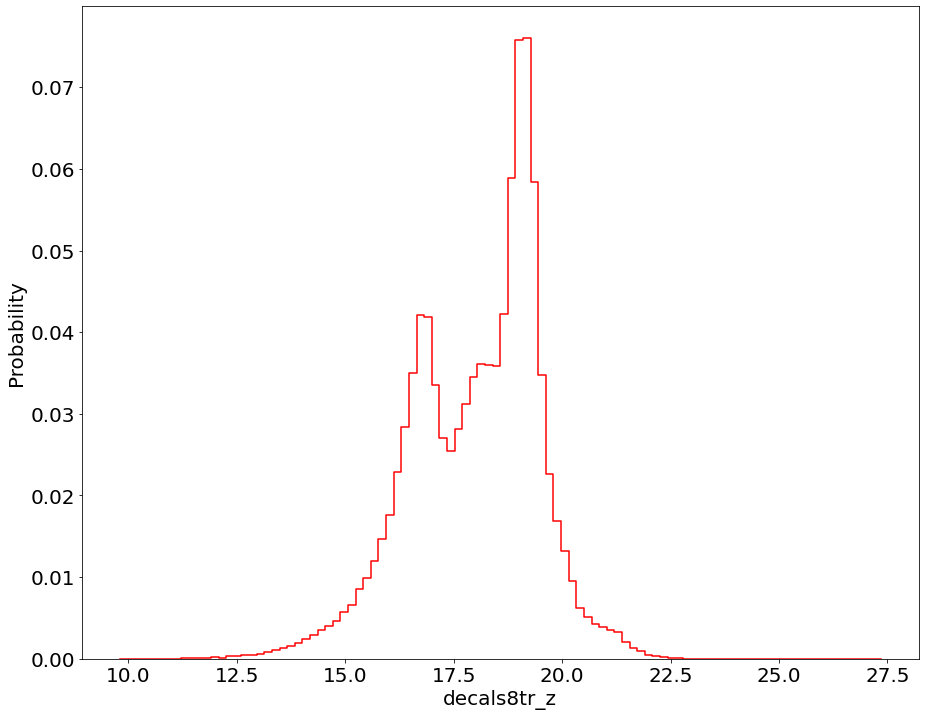

In [90]:
fig, ax = aug.plt.subplots(figsize=(15, 12))
aug.sns.histplot(input_data.loc[input_data['class']==3][features], ax=ax, bins = 100, color = 'r', stat="probability", element="step", fill=False)

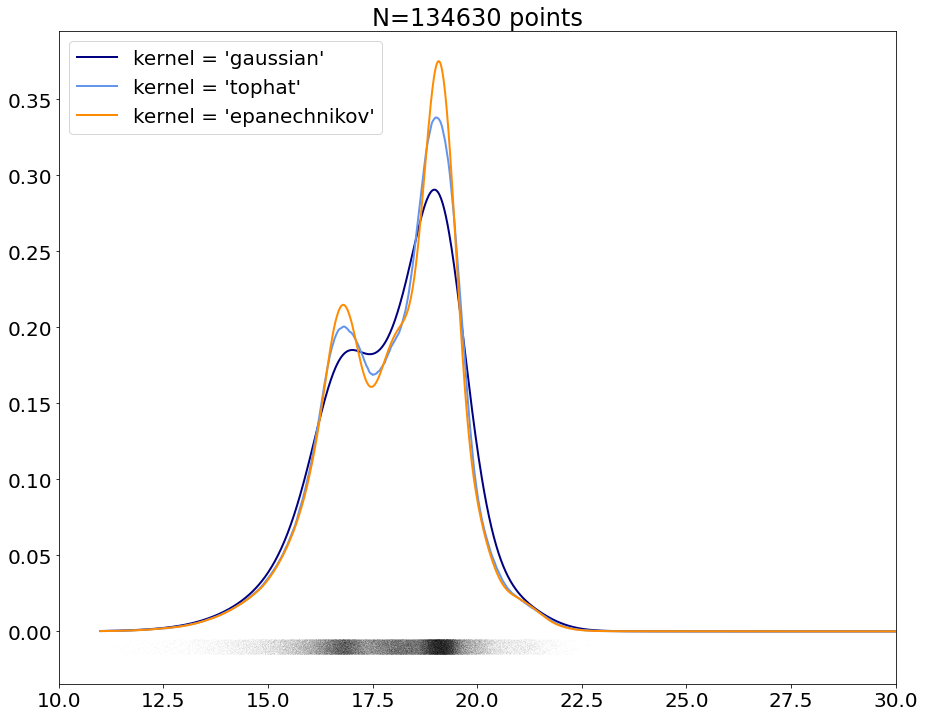

In [84]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version

X = input_data.loc[input_data['class']==3][features].dropna().values[:, np.newaxis]
N = len(X)
X_plot = np.linspace(11, 30, 1000)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(15, 12))

colors = ["navy", "cornflowerblue", "darkorange"]
kernels = ["gaussian", "tophat", "epanechnikov"]
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label=f"kernel = '{kernel}'",
    )

ax.set_title(f"N={N} points")

ax.legend(loc="upper left")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), "+k", markersize=0.01)

ax.set_xlim(10, 30)
# ax.set_ylim(-0.02, 0.4)
plt.show()

In [56]:
import warnings
warnings.filterwarnings("ignore")

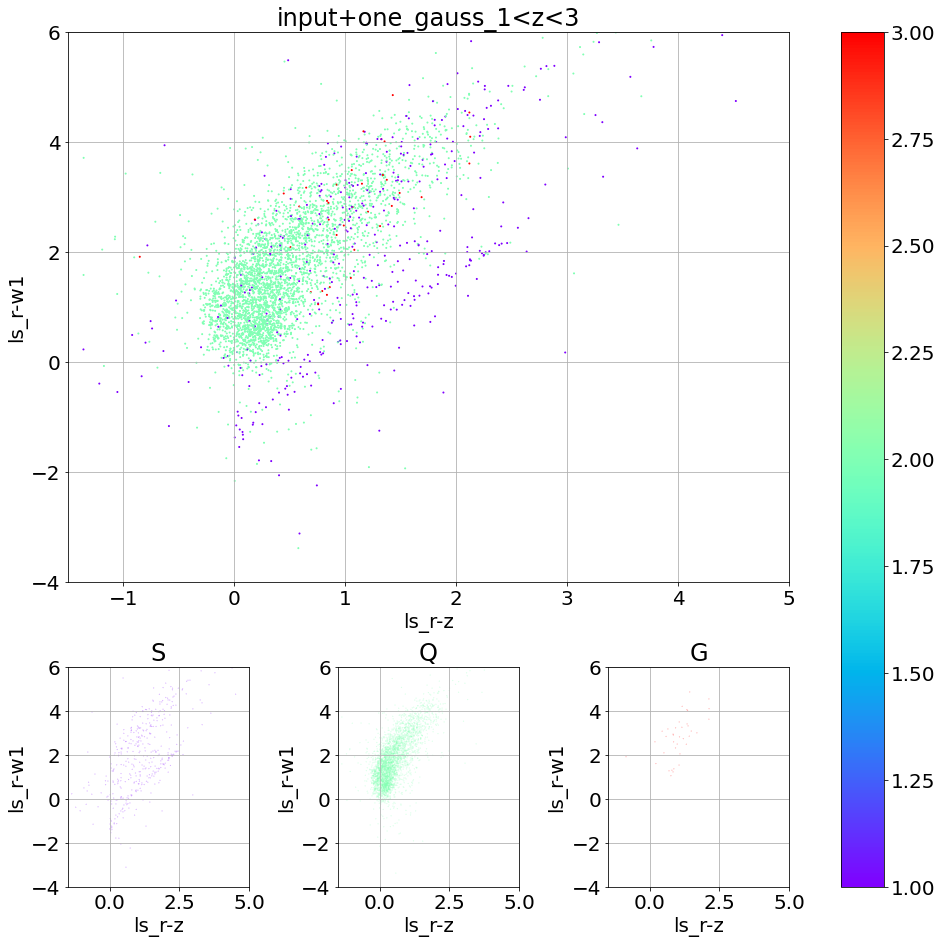

In [113]:
version='input+one_gauss'
i=3
j=1
model = SGQ.SGQModel(version=version)
pred = model.predict(picture_train.loc[(picture_train['zoo_best_z_max']> j) & (picture_train['zoo_best_z_max']<i) & (picture_train['zoo_best_z_maxConf']>0.2)], overviews='sdssdr16+psdr2+all_decals8tr')
aug.print_area(pred, 'predict_sdssdr16+psdr2+all_decals8tr', s=1, alpha=1, title=version+f'_{j}<z<{i}')

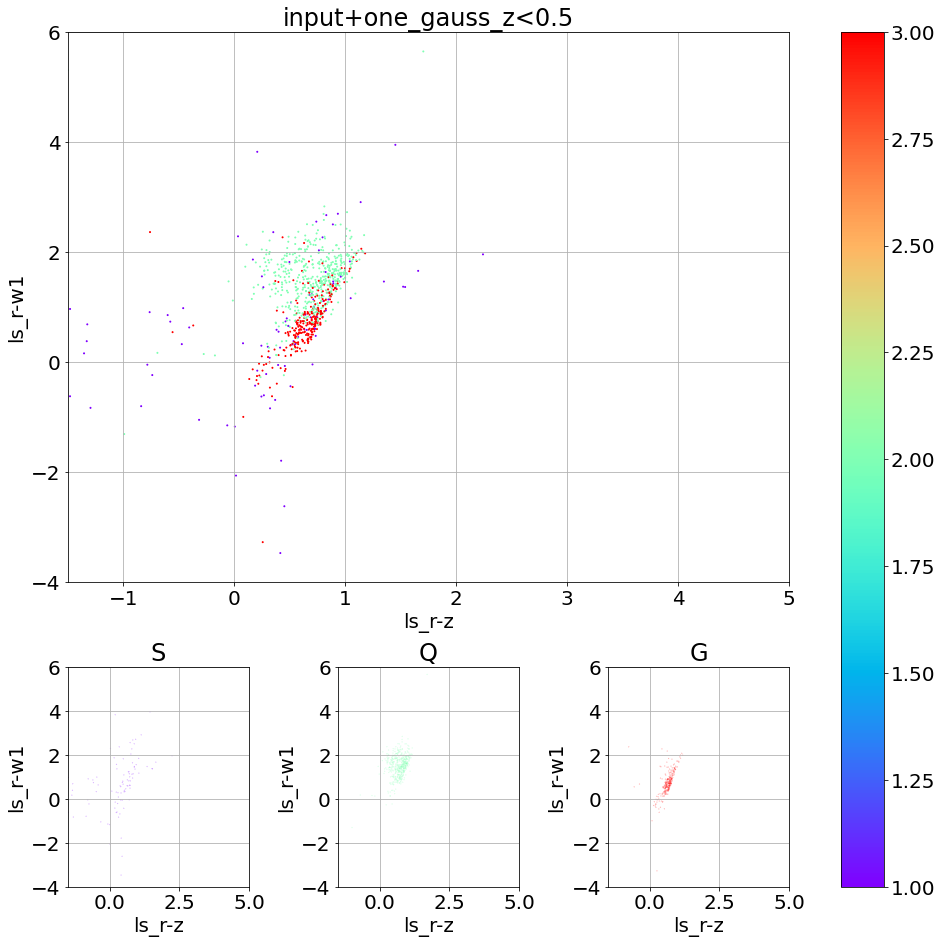

In [114]:
version='input+one_gauss'
i=0.5
# j=1
model = SGQ.SGQModel(version=version)
pred = model.predict(picture_train.loc[(picture_train['zoo_best_z_max']<i) & (picture_train['zoo_best_z_maxConf']>0.2)], overviews='sdssdr16+psdr2+all_decals8tr')
aug.print_area(pred, 'predict_sdssdr16+psdr2+all_decals8tr', s=1, alpha=1, title=version+f'_z<{i}')

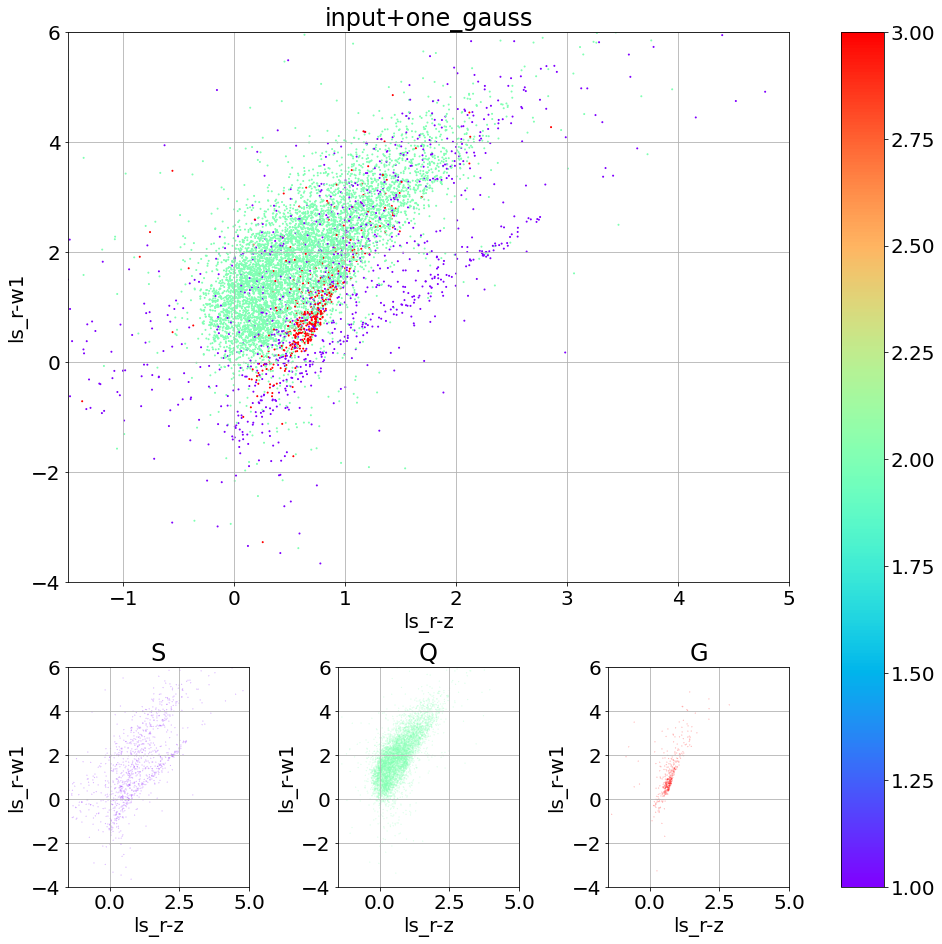

In [115]:
version='input+one_gauss'
model = SGQ.SGQModel(version=version)
pred = model.predict(picture_train, overviews='sdssdr16+psdr2+all_decals8tr')
aug.print_area(pred, 'predict_sdssdr16+psdr2+all_decals8tr', s=1, alpha=1, title=version)

In [117]:
version = 'optimization'
model = SGQ.SGQModel(version=version)
pred = model.predict(picture_train, overviews='sdssdr16+psdr2+all_decals8tr')

In [119]:
np.sum(pred['predict_sdssdr16+psdr2+all_decals8tr'] == 1), np.sum(pred['predict_sdssdr16+psdr2+all_decals8tr'] == 2), np.sum(pred['predict_sdssdr16+psdr2+all_decals8tr'] == 3)

(1390, 5714, 1395)

In [17]:
matrix = np.array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
matrix.T[list(set([0, 1, 2]) - set([2]))]

array([[2, 0, 1],
       [0, 0, 0]])

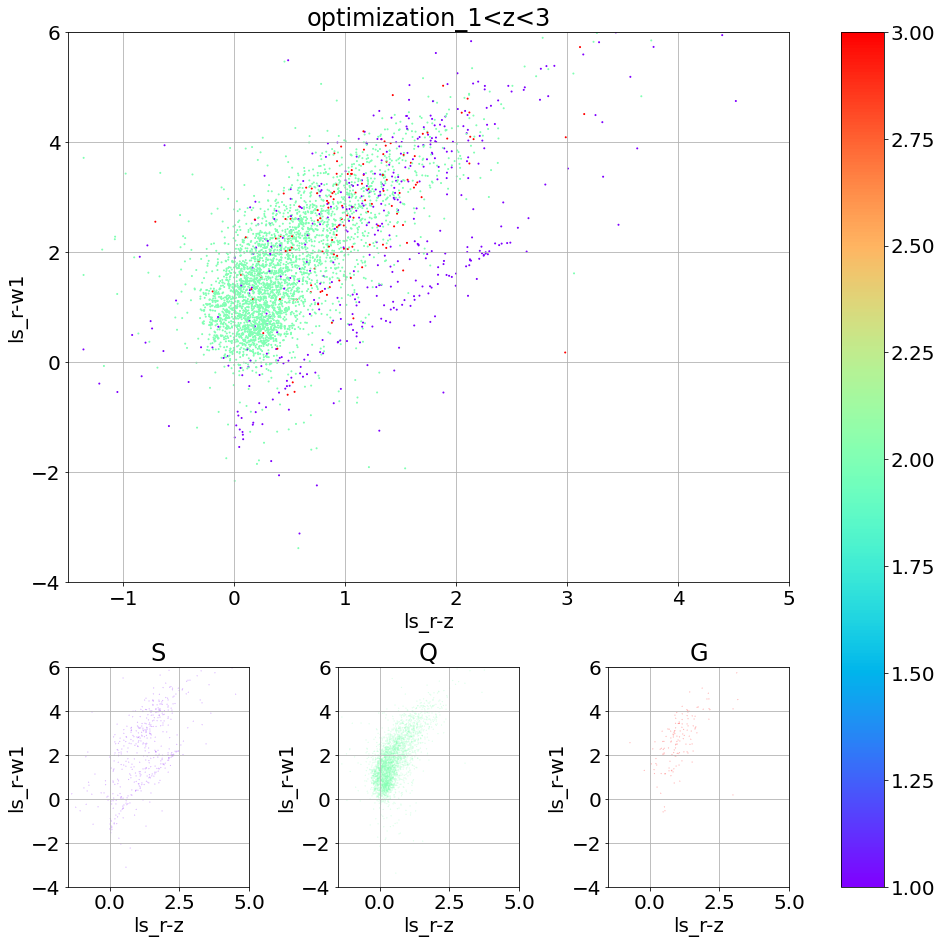

In [109]:
version = 'optimization'
i=3
j=1
model = SGQ.SGQModel(version=version)
pred = model.predict(picture_train.loc[(picture_train['zoo_best_z_max']> j) & (picture_train['zoo_best_z_max']<i) & (picture_train['zoo_best_z_maxConf']>0.2)], overviews='sdssdr16+psdr2+all_decals8tr')
aug.print_area(pred, 'predict_sdssdr16+psdr2+all_decals8tr', s=1, alpha=1, title=version+f'_{j}<z<{i}')

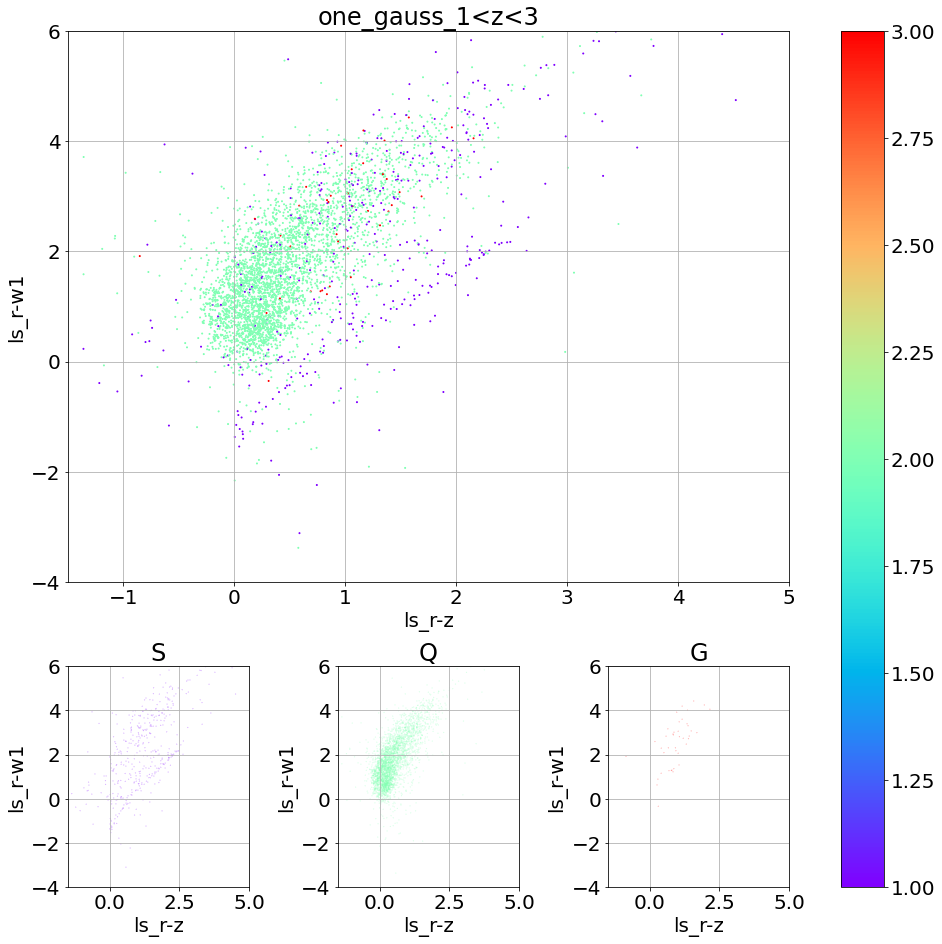

In [111]:
version = 'one_gauss'
i=3
j=1
model = SGQ.SGQModel(version=version)
pred = model.predict(picture_train.loc[(picture_train['zoo_best_z_max']> j) & (picture_train['zoo_best_z_max']<i) & (picture_train['zoo_best_z_maxConf']>0.2)], overviews='sdssdr16+psdr2+all_decals8tr')
aug.print_area(pred, 'predict_sdssdr16+psdr2+all_decals8tr', s=1, alpha=1, title=version+f'_{j}<z<{i}')

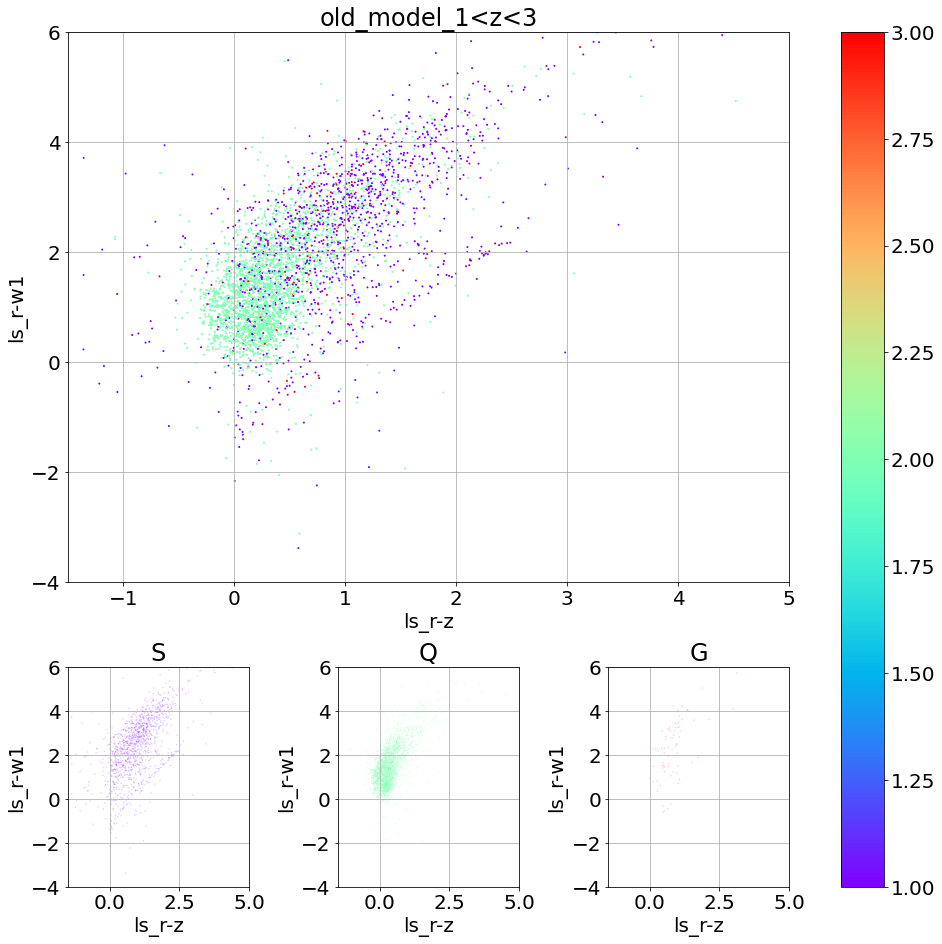

In [112]:
version = 'big_models'
i=3
j=1
model = SGQ.SGQModel(version=version)
pred = model.predict(picture_train.loc[(picture_train['zoo_best_z_max']> j) & (picture_train['zoo_best_z_max']<i) & (picture_train['zoo_best_z_maxConf']>0.2)], overviews='sdssdr16+psdr2+all_decals8tr')
aug.print_area(pred, 'predict_sdssdr16+psdr2+all_decals8tr', s=1, alpha=1, title='old_model'+f'_{j}<z<{i}')

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log10

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

invalid value encountered in log10



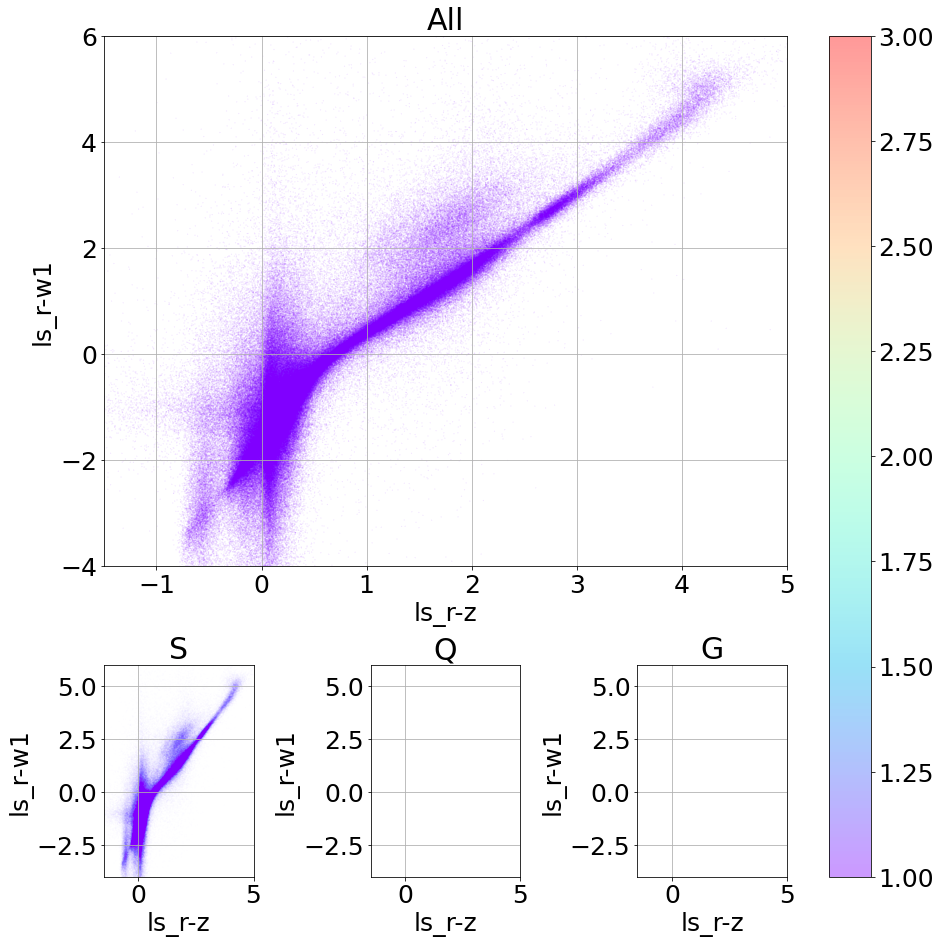

In [35]:
aug.print_area(input_data)

In [ ]:
pred_gaia = model.predict_gaia(input_data)
aug.print_area(pred_gaia.loc[pred_gaia['gaia_class'] > 0], 'gaia_class')

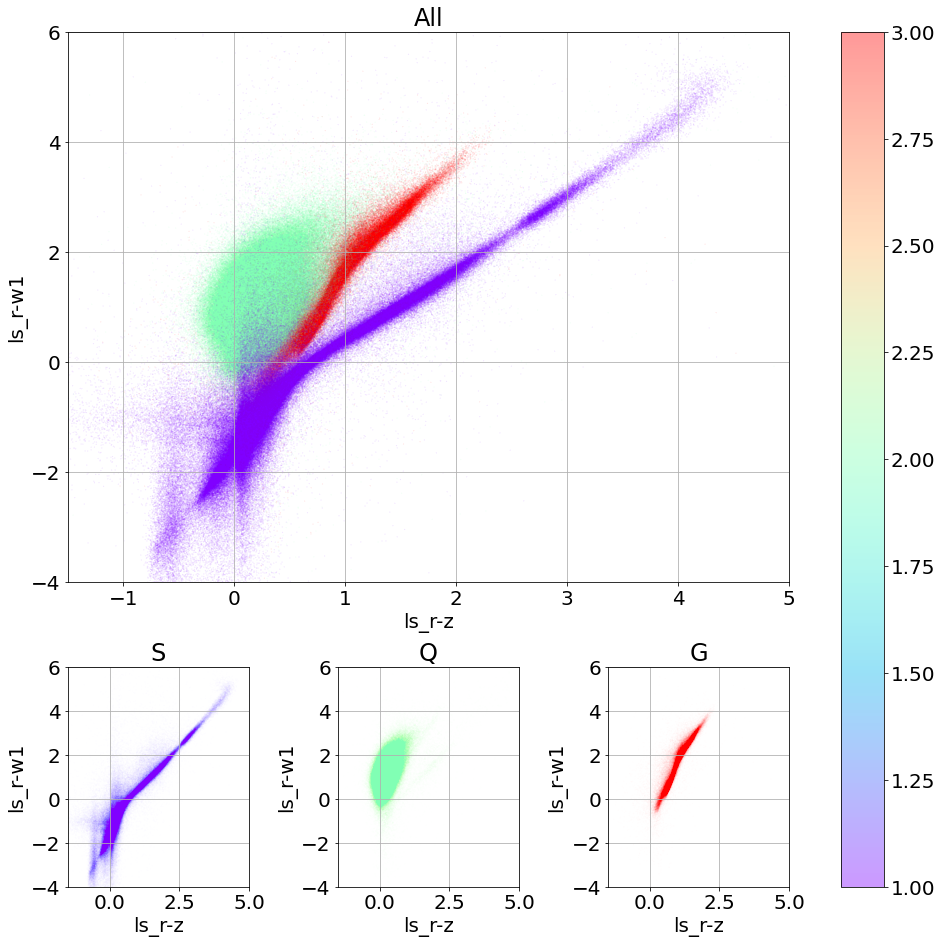

In [37]:
pred_gaia = model.predict_gaia(input_data)
aug.print_area(pred_gaia.loc[pred_gaia['gaia_class'] > 0], 'gaia_class')

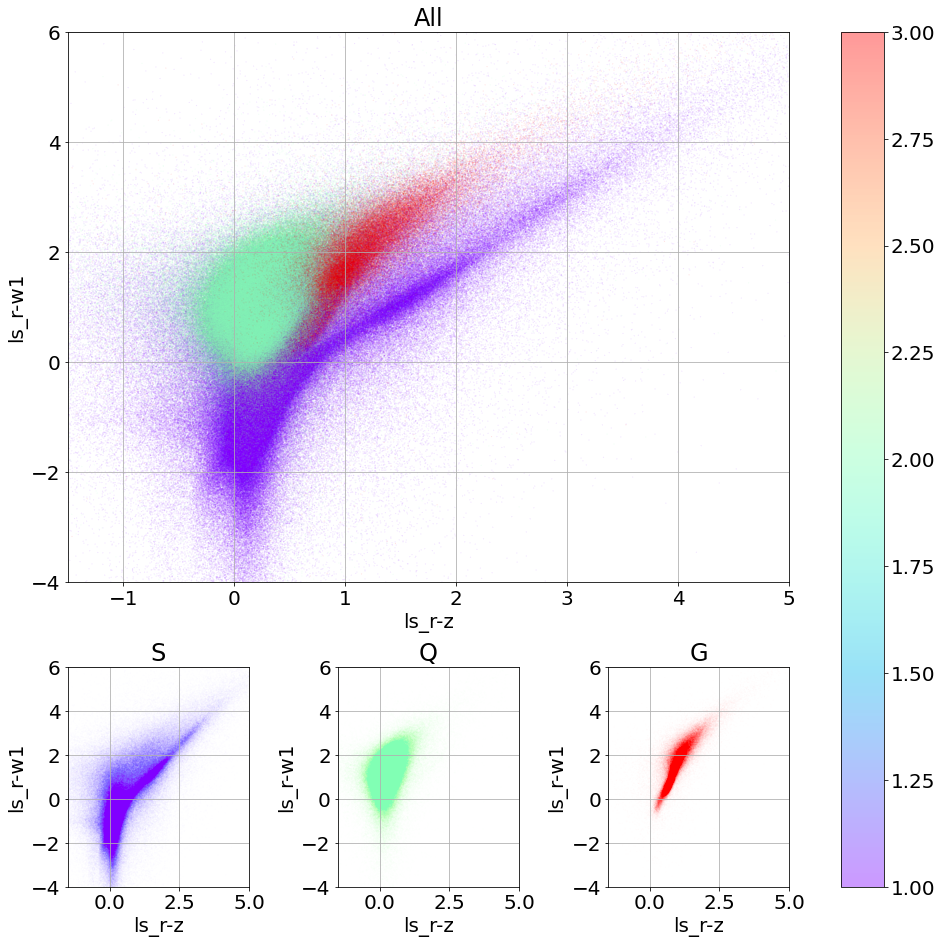

In [31]:
aug.print_area(df_after)

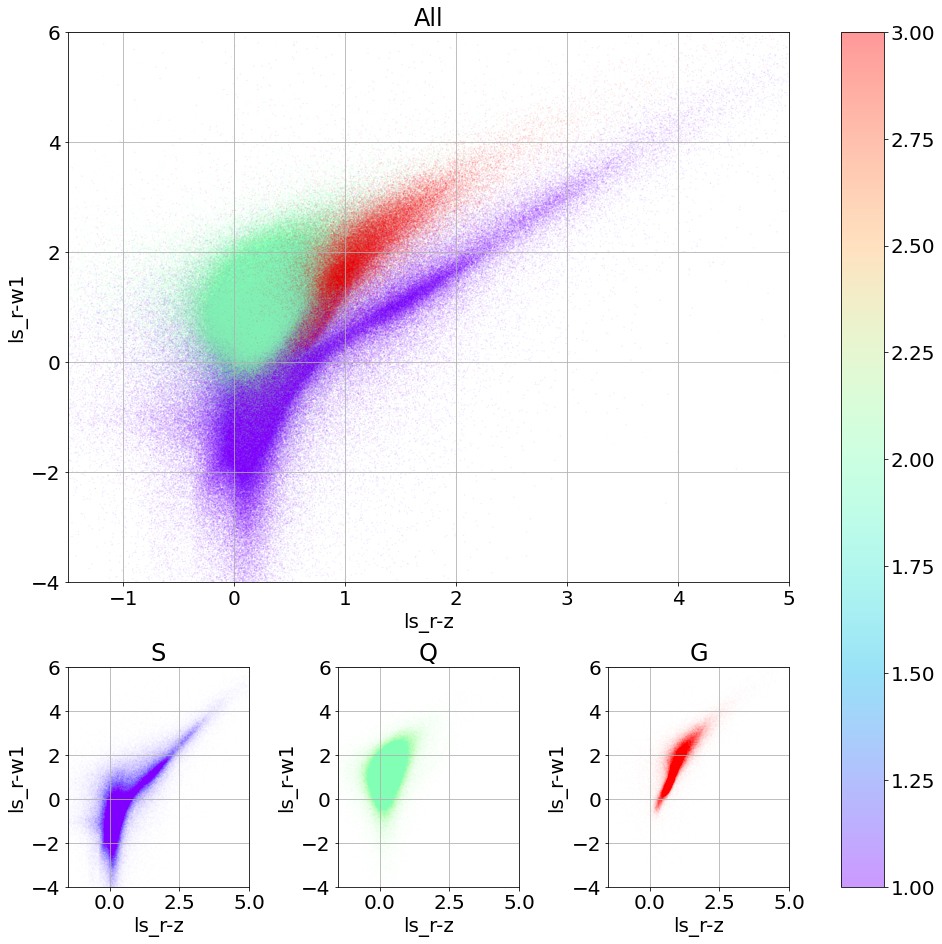

In [36]:
aug.print_area(pred_gaia.loc[pred_gaia['gaia_class'] > 0], 'gaia_class')